The difference between KNN is that in K-Means you do not have labels.
It is an unsupervised learning algorithm.


K is the number of different clusters you choose to have.

First of all, you initizate 3 random clusters near your data points. Then you calculate the distance of every data point to every cluster point. Then you classify the data point based on what cluster is closer to it.

Then the next iteration, you choose you new cluster point to be the mean of each cluster.

We do this until max itterations or until no changes are applied.

## Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:

        
        
    def __init__(self, k = 3):
        self.k = k
        self.centroids = None
        
    # it returns an array of size k, which tells us the distance of a specific point from all the centroids
    def distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis = 1))
        
    
    # Here we fit our points and also do the itterations    
    def fit(self, X, max_iterations = 200):
        self.centroids = np.random.uniform(np.min(X, axis = 0), np.max(X, axis=0)
                                          , size = (self.k, X.shape[1])) # we need good initialization to perform better
        for _ in range(max_iterations):
            y = []
            for data_point in X:
                distances = KMeans.distance(data_point, self.centroids)
                cluster_num = np.argmin(distances) # returns the index of the smallest value
                y.append(cluster_num)
                
            y = np.array(y)
            
            # Here we put every point to each cluster that it is in
            cluster_indices = []
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i)) # returns the index in the form [row, column] 
                                                            # where the condition applies
            # Here we update our centroids   
            cluster_centers = []
            
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis = 0)[0])
            
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)
                
        return y

## 2D Points

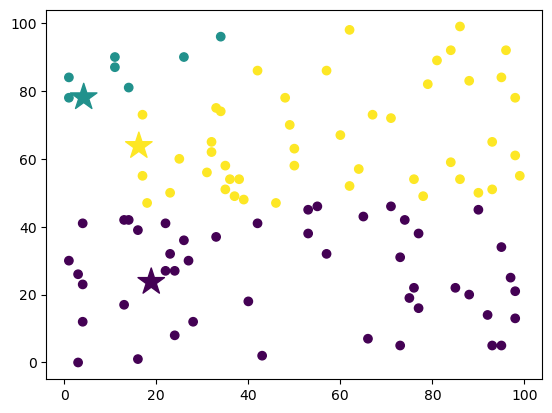

In [3]:
random_points = np.random.randint(0, 100 ,(100,2))
kmeans = KMeans(k = 3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:,0], random_points[:,1], c = labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],  c = range(len(kmeans.centroids)),
                    marker ="*", s=400)
plt.show()

## 3D Points

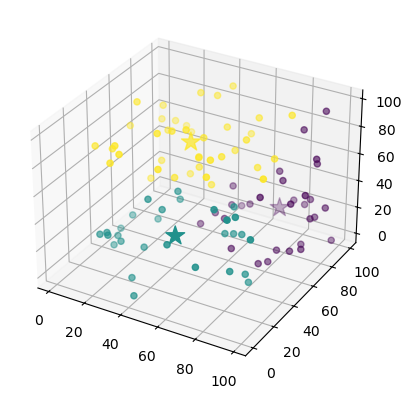

In [4]:
from mpl_toolkits.mplot3d import Axes3D

random_points = np.random.randint(0, 100 ,(100,3))
kmeans = KMeans(k = 3)
labels = kmeans.fit(random_points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(random_points[:,0], random_points[:,1], random_points[:,2], c=labels)
ax.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], kmeans.centroids[:,2], 
           c=range(len(kmeans.centroids)), marker="*", s=200)

plt.show()

## Case study in airbnb

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('airbnb.csv')

In [7]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [8]:
df = df[['latitude','longitude','price']]

In [9]:
df = np.array(df)

In [10]:
df

array([[ 40.64749, -73.97237, 149.     ],
       [ 40.75362, -73.98377, 225.     ],
       [ 40.80902, -73.9419 , 150.     ],
       ...,
       [ 40.81475, -73.94867, 115.     ],
       [ 40.75751, -73.99112,  55.     ],
       [ 40.76404, -73.98933,  90.     ]])

In [11]:
kmeans = KMeans(k = 3)
labels = kmeans.fit(df)


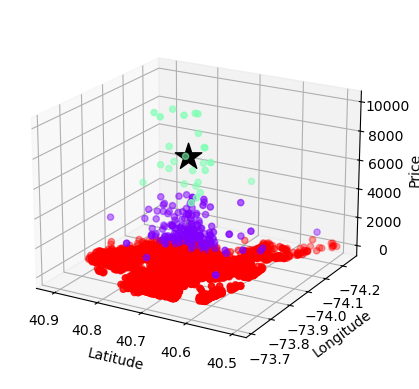

In [12]:
colors = plt.cm.rainbow(np.linspace(0, 1, kmeans.k)) 
cluster_colors = [colors[label] for label in labels]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[:, 0], df[:, 1], df[:, 2], c=cluster_colors)
ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], kmeans.centroids[:, 2], c='black', marker='*', s=400)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Price')

ax.view_init(elev=20, azim=120)
# Show the plot
plt.show()

We can see that the pricier houses are those that are close to the median of latitude and longitude.